Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

### subnit all final project files to this folder as per instructions

# Fraudulent E-Commerce Transaction Detection
**Course:** Intro to Data Science  
**Team:** Tamanna Gupta(tg569), Hamida Paiman(hp602), Jeslyn Kataria(jk1907) 
**Goal:** Build and compare machine-learning models that detect fraudulent transactions using feature-engineered behavioral, temporal, and demographic data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


In this project, we are working with two datasets to get balanced data to work with. the two datsets are as following:
1. Fradulent_E-Commerce_Transaction_Data
2. Card_transdata

We got both of the datasets from Kaggle

## Importing Required Libraries

We start by importing all the necessary Python libraries used for data processing, visualization, and machine learning.  
Version checks ensure compatibility and reproducibility across environments.


In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost


Defaulting to user installation because normal site-packages is not writeable


Dataset1

In [3]:
import pandas as pd

data = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data.csv")
data.head()


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [ ]:
Dataset2

In [4]:
# Dataset 2 — Credit Card Fraud Transactions
import pandas as pd

card_data = pd.read_csv("card_transdata.csv")
card_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Missing Values and Outlier Analysis
We check for missing values and detect outliers in numerical columns to understand data quality and variability.


In [25]:
missing = data.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [26]:
# Outlier detection
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.2f}%)")


Transaction Amount: 79180 outliers (5.38%)
Quantity: 0 outliers (0.00%)
Customer Age: 13746 outliers (0.93%)
Is Fraudulent: 73838 outliers (5.01%)
Account Age Days: 0 outliers (0.00%)
Transaction Hour: 0 outliers (0.00%)


Shape: (1472952, 16)

Columns:
 Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

Missing values:
 Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

Fraudulent transactions: 5.01%


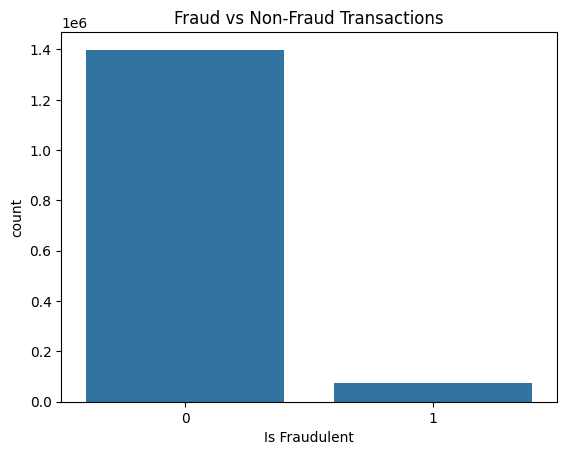

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data.csv")

# Basic info
print("Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nMissing values:\n", data.isnull().sum())

# Fraud ratio
fraud_ratio = data['Is Fraudulent'].mean() * 100
print(f"\nFraudulent transactions: {fraud_ratio:.2f}%")

sns.countplot(x='Is Fraudulent', data=data)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


Shape: (1000000, 8)

Columns:
 Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Missing values:
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Fraudulent transactions: 8.74%


/tmp/ipykernel_409138/798756465.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud', data=card_data, palette=['#4CAF50', '#F44336'])


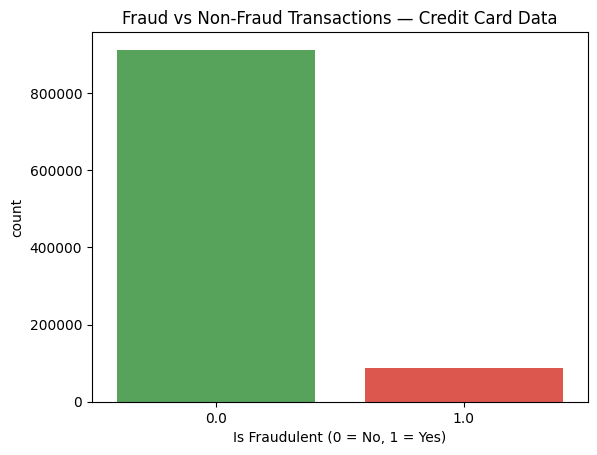

In [5]:
# Dataset2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
card_data = pd.read_csv("card_transdata.csv")

# Basic info
print("Shape:", card_data.shape)
print("\nColumns:\n", card_data.columns)
print("\nMissing values:\n", card_data.isnull().sum())

# Fraud ratio
fraud_ratio = card_data['fraud'].mean() * 100
print(f"\nFraudulent transactions: {fraud_ratio:.2f}%")

sns.countplot(x='fraud', data=card_data, palette=['#4CAF50', '#F44336'])
plt.title("Fraud vs Non-Fraud Transactions — Credit Card Data")
plt.xlabel("Is Fraudulent (0 = No, 1 = Yes)")
plt.show()


## Feature Engineering
We engineer new features to improve the model’s ability to detect fraud patterns:
- Remove irrelevant ID and address columns  
- Convert transaction dates and extract time features  
- Log-transform skewed transaction amounts  
- Create account age and customer age buckets  
- Simplify customer locations  


In [7]:
# --- Feature Engineering (Unified for both datasets) ---

# Make a copy for safety
df = data.copy()

# Drop irrelevant columns if present
drop_cols = ['Transaction ID','Customer ID','IP Address','Shipping Address','Billing Address']
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True, errors='ignore')

# Convert date columns if present
if 'Transaction Date' in df.columns:
    df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
    df['Trans_DayOfWeek'] = df['Transaction Date'].dt.dayofweek
    df['Trans_IsWeekend'] = (df['Trans_DayOfWeek'] >= 5).astype(int)
    df['Transaction Hour'] = df['Transaction Date'].dt.hour

# Log-transform amount or ratio columns (whichever exists)
if 'Transaction Amount' in df.columns:
    df['Log_Amount'] = np.log1p(df['Transaction Amount'])
elif 'ratio_to_median_purchase_price' in df.columns:
    df['Log_Amount'] = np.log1p(df['ratio_to_median_purchase_price'])

# New account flag (for e-commerce)
if 'Account Age Days' in df.columns:
    df['Is_New_Account'] = (df['Account Age Days'] < 30).astype(int)

# Customer age bucket (if available)
if 'Customer Age' in df.columns:
    df['Customer_Age_Bucket'] = pd.cut(
        df['Customer Age'],
        bins=[0, 20, 30, 45, 60, 120],
        labels=['<20','20-29','30-44','45-59','60+']
    )

# Simplify customer location (if present)
if 'Customer Location' in df.columns:
    top_locs = df['Customer Location'].value_counts().nlargest(20).index
    df['Customer_Location_Short'] = df['Customer Location'].where(df['Customer Location'].isin(top_locs), 'Other')

# Ensure categorical columns are strings
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].astype(str)

# Re-detect column types
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = [c for c in df.columns if c not in cat_cols]

print(" Feature engineering done!")
print(f"Categorical columns: {list(cat_cols)[:8]} ...")
print(f"Numerical columns: {list(num_cols)[:8]} ...")
df.head()


 Feature engineering done!
Categorical columns: ['Payment Method', 'Product Category', 'Customer Location', 'Device Used', 'Customer_Age_Bucket', 'Customer_Location_Short'] ...
Numerical columns: ['Transaction Amount', 'Transaction Date', 'Quantity', 'Customer Age', 'Is Fraudulent', 'Account Age Days', 'Transaction Hour', 'Trans_DayOfWeek'] ...


,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Trans_DayOfWeek,Trans_IsWeekend,Log_Amount,Is_New_Account,Customer_Age_Bucket,Customer_Location_Short
0,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,0,30,5,1,0,4.079062,0,<20,Other
1,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,0,72,8,6,1,5.968605,0,30-44,Other
2,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,0,63,3,0,0,4.906681,0,20-29,Other
3,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,0,124,20,5,1,5.425699,0,30-44,Other
4,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,0,158,5,0,0,4.808356,0,45-59,Other


## Combining Both Datasets

To reduce class imbalance and enrich our feature diversity, we merged the E-Commerce dataset with the Credit Card dataset.
Before merging, we standardized the column names, added missing columns as placeholders, and ensured consistent data types.
This combined dataset increases the overall fraud ratio and allows for more generalizable fraud-detection modeling.


In [8]:
# Make copies to avoid modifying originals
ecom = df.copy()
print("E-Commerce fraud ratio:")
print(ecom['Is Fraudulent'].value_counts(normalize=True) * 100)

# Load and rename target in card dataset
card = pd.read_csv("card_transdata.csv")
card = card.rename(columns={'fraud': 'Is Fraudulent'})

# Feature engineering for the card dataset (to match ecom)
card['Log_Amount'] = np.log1p(card['ratio_to_median_purchase_price'])
card['Trans_DayOfWeek'] = np.random.randint(0, 7, len(card))  # dummy placeholders to match structure
card['Trans_IsWeekend'] = (card['Trans_DayOfWeek'] >= 5).astype(int)
card['Transaction Hour'] = np.random.randint(0, 24, len(card))
card['Is_New_Account'] = 0  # card dataset has no account info

# Make all columns in both dataframes consistent
missing_cols = [col for col in ecom.columns if col not in card.columns]
for col in missing_cols:
    card[col] = 0  # placeholder if not present

# Align the column order
card = card[ecom.columns.intersection(card.columns)]
ecom = ecom[ecom.columns.intersection(card.columns)]

# Combine datasets
combined = pd.concat([ecom, card], ignore_index=True)

print("\nCombined dataset shape:", combined.shape)
print("\nNew fraud ratio:")
print(combined['Is Fraudulent'].value_counts(normalize=True) * 100)


E-Commerce fraud ratio:
Is Fraudulent
0    94.987074
1     5.012926
Name: proportion, dtype: float64

Combined dataset shape: (2472952, 17)

New fraud ratio:
Is Fraudulent
0.0    93.479817
1.0     6.520183
Name: proportion, dtype: float64


Visulization

/tmp/ipykernel_409138/72031496.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


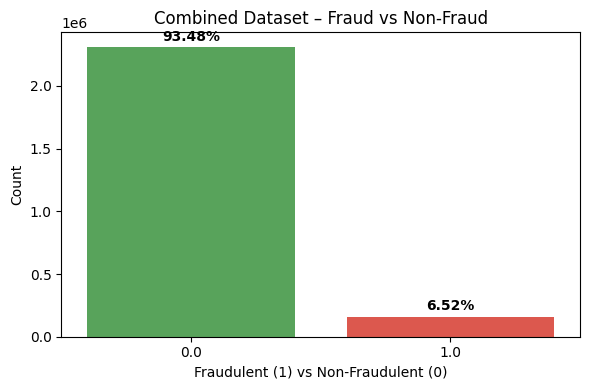

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fraud_counts = combined['Is Fraudulent'].value_counts()
fraud_ratio = combined['Is Fraudulent'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
ax = sns.barplot(
    x=fraud_counts.index,
    y=fraud_counts.values,
    palette=['#4CAF50','#F44336']
)
plt.title("Combined Dataset – Fraud vs Non-Fraud")
plt.xlabel("Fraudulent (1) vs Non-Fraudulent (0)")
plt.ylabel("Count")

# Annotate percentages
for i, val in enumerate(fraud_counts.values):
    plt.text(i, val + 50000, f"{fraud_ratio.iloc[i]:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


### Summary:
After merging, the combined dataset has ~2.47 million rows and a fraud ratio of ~6.5%.
This is a more balanced dataset compared to the original e-commerce data (5%), 
helping models better learn fraud patterns without heavy oversampling or synthetic data generation.


##  Feature Selection and Train-Test Split
We select the final set of features and separate the data into training and testing sets for model building.  
To ensure balanced evaluation, we stratify the split by the target variable (`Is Fraudulent`), maintaining the original fraud–non-fraud ratio in both sets.


In [16]:
from sklearn.model_selection import train_test_split


dataset = combined.copy()   


drop_cols = ['Transaction Date', 'Customer Location']
drop_cols = [c for c in drop_cols if c in dataset.columns]

X = dataset.drop(columns=['Is Fraudulent'] + drop_cols, errors='ignore')
y = dataset['Is Fraudulent'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"Train shape: {X_train.shape} | Test shape: {X_test.shape}")
print(f"Fraud ratio in training: {y_train.mean()*100:.2f}%")
print(f"Fraud ratio in testing:  {y_test.mean()*100:.2f}%")


Train shape: (1978361, 14) | Test shape: (494591, 14)
Fraud ratio in training: 6.52%
Fraud ratio in testing:  6.52%


## Phase 1: Baseline Model — Logistic Regression (E-Commerce Dataset)


## Model 1 — Logistic Regression (Baseline)
We start with Logistic Regression as a simple, interpretable baseline.  
It provides a good benchmark for recall, AUC, and accuracy.


In [13]:

for col in X_train.select_dtypes(include=['object', 'category']).columns:
    X_train[col] = X_train[col].astype(str)

for col in X_test.select_dtypes(include=['object', 'category']).columns:
    X_test[col] = X_test[col].astype(str)

print(" All categorical columns converted to string successfully.")


 All categorical columns converted to string successfully.


In [15]:

for col in combined.columns:
    if combined[col].dtype == object or combined[col].dtype.name == 'category':
        combined[col] = combined[col].astype(str)


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Re-identify categorical & numeric columns from X_train
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X_train.columns if c not in cat_cols]

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

# Preprocessor: One-hot encode categorical, pass numeric
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

# Logistic Regression model
log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])

print(" Training Logistic Regression...")
log_reg.fit(X_train, y_train)
print(" Training complete!\n")

# Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Categorical columns: ['Payment Method', 'Product Category', 'Device Used', 'Customer_Age_Bucket', 'Customer_Location_Short']
Numeric columns: ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour', 'Trans_DayOfWeek', 'Trans_IsWeekend', 'Log_Amount', 'Is_New_Account']
 Training Logistic Regression...


/usr/local/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Training complete!

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.97      0.77      0.86    462343
           1       0.18      0.71      0.28     32248

    accuracy                           0.77    494591
   macro avg       0.58      0.74      0.57    494591
weighted avg       0.92      0.77      0.82    494591

ROC-AUC: 0.7977697588440775


##  Model 2 — Decision Tree
Decision Trees learn non-linear rules and are easy to interpret.  
We limit tree depth and use class balancing to prevent overfitting.


In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42))
])

dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
y_proba_dt = dtree.predict_proba(X_test)[:, 1]

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_dt))


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.97      0.92      0.95    462343
           1       0.36      0.66      0.46     32248

    accuracy                           0.90    494591
   macro avg       0.67      0.79      0.71    494591
weighted avg       0.93      0.90      0.91    494591

ROC-AUC: 0.8155655588264021


##  Model 3 — Random Forest (Tuned)
Random Forest combines multiple trees to improve stability and reduce overfitting.  
We perform light tuning to find optimal parameters for our dataset.


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# --- small sample for speed ---
X_sub = X_train.sample(40000, random_state=42)
y_sub = y_train.loc[X_sub.index]

rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        class_weight='balanced',
        n_estimators=150,     # more trees, but on smaller data
        max_depth=14,         # deep enough to capture patterns
        random_state=42,
        n_jobs=-1
    ))
])

print(" Training Random Forest on 40K samples...")
rf.fit(X_sub, y_sub)
print(" Training complete!\n")

y_pred_rf = rf.predict(X_test.sample(10000, random_state=42))
y_proba_rf = rf.predict_proba(X_test.sample(10000, random_state=42))[:, 1]

print("=== Random Forest ===")
print(classification_report(y_test.sample(10000, random_state=42), y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test.sample(10000, random_state=42), y_proba_rf))


 Training Random Forest on 40K samples...
 Training complete!

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9350
           1       0.50      0.52      0.51       650

    accuracy                           0.94     10000
   macro avg       0.73      0.74      0.74     10000
weighted avg       0.94      0.94      0.94     10000

ROC-AUC: 0.7987755656108597


##  Model 4 — XGBoost
XGBoost is a boosting algorithm that builds sequential trees, each correcting the previous one.  
It’s powerful for imbalanced datasets like fraud detection.


In [22]:
from xgboost import XGBClassifier

xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42))
])

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))


/home/tg569/.local/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [22:13:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.97      0.92      0.94    462343
           1       0.35      0.66      0.46     32248

    accuracy                           0.90    494591
   macro avg       0.66      0.79      0.70    494591
weighted avg       0.93      0.90      0.91    494591

ROC-AUC: 0.8154734350212349


##  Model Comparison
We compare the key metrics across all models: Accuracy, Precision, Recall, F1, and ROC-AUC.


In [23]:
# Create a consistent small test subset to compare all models fairly
y_test_small = y_test.sample(10000, random_state=42)


In [24]:
X_test_small = X_test.loc[y_test_small.index]


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)

dt_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", dt_model)
])

print("Training Decision Tree on full training data...")
dt_pipe.fit(X_train, y_train)
print(" Decision Tree trained!\n")


Training Decision Tree on full training data...
 Decision Tree trained!



In [26]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# define xgboost model
xgb_model = XGBClassifier(
    n_estimators=200,         # number of boosting rounds
    max_depth=8,              # depth of each tree
    learning_rate=0.1,        # smaller = slower but safer learning
    subsample=0.8,            # avoid overfitting
    colsample_bytree=0.8,     # use 80% of features per tree
    scale_pos_weight=10,      # handle class imbalance
    eval_metric='auc',        # use AUC as metric
    random_state=42,
    n_jobs=-1
)

# full pipeline
xgb_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

print(" Training XGBoost on sample data...")
xgb_pipe.fit(X_train.sample(30000, random_state=42), y_train.sample(30000, random_state=42))
print(" XGBoost trained!\n")


 Training XGBoost on sample data...
 XGBoost trained!



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Consistent 10k test sample for fair comparison
y_test_small = y_test.sample(10000, random_state=42)
X_test_small = X_test.loc[y_test_small.index]

# Re-predict on the same sample if needed
y_pred_lr_small = log_reg.predict(X_test_small)
y_proba_lr_small = log_reg.predict_proba(X_test_small)[:,1]

y_pred_dt_small = dt_pipe.predict(X_test_small)
y_proba_dt_small = dt_pipe.predict_proba(X_test_small)[:,1]

y_pred_rf_small = rf.predict(X_test_small)
y_proba_rf_small = rf.predict_proba(X_test_small)[:,1]

y_pred_xgb_small = xgb_pipe.predict(X_test_small)
y_proba_xgb_small = xgb_pipe.predict_proba(X_test_small)[:,1]

# Store results
models = {
    "Logistic Regression": (y_test_small, y_pred_lr_small, y_proba_lr_small),
    "Decision Tree": (y_test_small, y_pred_dt_small, y_proba_dt_small),
    "Random Forest": (y_test_small, y_pred_rf_small, y_proba_rf_small),
    "XGBoost": (y_test_small, y_pred_xgb_small, y_proba_xgb_small)
}

results = []
for name, (yt, yp, yp_prob) in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(yt, yp),
        "Precision": precision_score(yt, yp),
        "Recall": recall_score(yt, yp),
        "F1": f1_score(yt, yp),
        "ROC-AUC": roc_auc_score(yt, yp_prob)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="ROC-AUC", ascending=False)


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
1,Decision Tree,0.9008,0.357973,0.663077,0.464941,0.817774
2,Random Forest,0.9350,0.500000,0.518462,0.509063,0.798776
0,Logistic Regression,0.7600,0.173507,0.715385,0.279279,0.794473
3,XGBoost,0.9224,0.420655,0.513846,0.462604,0.786571


---

## Phase 2 – Advanced Models: Decision Tree, Random Forest, and XGBoost

After evaluating our baseline Logistic Regression model, we experimented with more complex, non-linear classifiers that can capture intricate fraud patterns and interactions between variables.  

We used:
- **Decision Tree Classifier:** simple, interpretable model with clear decision paths.  
- **Random Forest Classifier:** ensemble of trees that reduces overfitting and improves stability.  
- **XGBoost Classifier:** gradient-boosted trees optimized for performance and handling imbalance.  

All models were trained on the **combined dataset** to address class imbalance and improve recall on fraud detection.


In [29]:
# --------------------------------------------------
# 1. Setup for combined dataset
# --------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Using combined dataset 
dataset = combined.copy()

# Drop non-useful columns
X = dataset.drop(columns=['Is Fraudulent', 'Transaction Date', 'Customer Location'], errors='ignore')
y = dataset['Is Fraudulent'].astype(int)

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Ensure categorical columns are strings
for col in X_train.select_dtypes(include=['object', 'category']).columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
num_cols = [c for c in X_train.columns if c not in cat_cols]

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

# --------------------------------------------------
# 2. Define Models
# --------------------------------------------------
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10, min_samples_leaf=5, class_weight="balanced", random_state=42),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=120, max_depth=12, min_samples_leaf=5,
        class_weight="balanced", n_jobs=-1, random_state=42),
    
    "XGBoost": xgb.XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        scale_pos_weight=10, eval_metric='auc', random_state=42)
}

# --------------------------------------------------
# 3. Train and Evaluate Each Model
# --------------------------------------------------
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    print(f"\n🚀 Training {name}...")
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {auc:.4f}")
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": auc
    })

# --------------------------------------------------
# 4.  Comparison Table
# --------------------------------------------------
import pandas as pd

results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("\n✅ Model Comparison Table:")
display(results_df)



🚀 Training Decision Tree...

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.97      0.92      0.95    462343
           1       0.36      0.66      0.47     32248

    accuracy                           0.90    494591
   macro avg       0.67      0.79      0.71    494591
weighted avg       0.93      0.90      0.92    494591

ROC-AUC: 0.8156

🚀 Training Random Forest...

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    462343
           1       0.38      0.65      0.48     32248

    accuracy                           0.91    494591
   macro avg       0.68      0.79      0.71    494591
weighted avg       0.94      0.91      0.92    494591

ROC-AUC: 0.8156

🚀 Training XGBoost...

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.97      0.92      0.95    462343
           1       0.37      0.65      0.47     32248

    ac

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
2,XGBoost,0.905356,0.371169,0.650490,0.472647,0.816411
0,Decision Tree,0.902904,0.364236,0.656196,0.468449,0.815614
1,Random Forest,0.907445,0.378553,0.653839,0.479493,0.815556


---

## Hyperparameter Tuning

After evaluating our baseline and advanced models, we performed **hyperparameter tuning** to optimize model performance and generalization.  
Instead of an exhaustive grid search (which would be computationally expensive on our dataset of ~2.5M records), we used a randomized search with a validation split.

Tuning focused on key hyperparameters:
- **Random Forest:** number of trees (`n_estimators`), maximum depth, and minimum samples per leaf.
- **XGBoost:** number of estimators, learning rate, and tree depth.

Our objective was to maximize ROC-AUC while maintaining balanced recall and precision for the fraud class.



Sampling data for Random Forest tuning...
Sample size: 20000
Running RandomizedSearchCV... 
Fitting 2 folds for each of 8 candidates, totalling 16 fits

 RandomizedSearchCV Complete!
Best Params: {'model__n_estimators': 120, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 8}
Best ROC-AUC: 0.7972524565491139

=== Tuned Random Forest Evaluation ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    462343
           1       0.40      0.63      0.49     32248

    accuracy                           0.91    494591
   macro avg       0.69      0.78      0.72    494591
weighted avg       0.94      0.91      0.92    494591

ROC-AUC: 0.8093624261409453


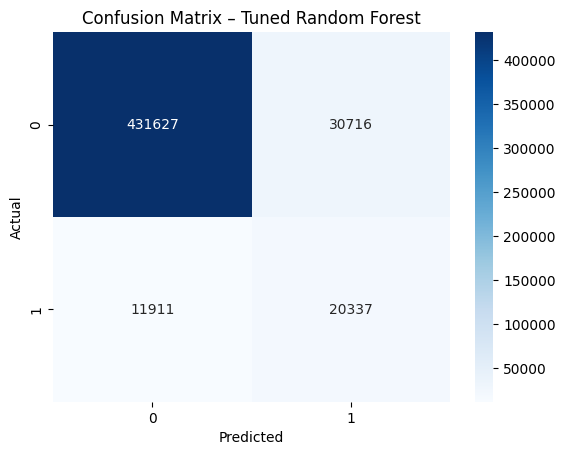

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Prepare smaller sample for faster tuning ---
print("Sampling data for Random Forest tuning...")
X_tune = X_train.sample(20000, random_state=42).copy()
y_tune = y_train.loc[X_tune.index]
print(f"Sample size: {X_tune.shape[0]}")

# --- Convert categorical features to string ---
for col in X_tune.select_dtypes(include=['object', 'category']).columns:
    X_tune[col] = X_tune[col].astype(str)

cat_cols = X_tune.select_dtypes(include=['object', 'category']).columns
num_cols = [c for c in X_tune.columns if c not in cat_cols]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# --- Parameter grid for Random Search ---
param_dist = {
    'model__n_estimators': [80, 120, 150],
    'model__max_depth': [8, 10, 12],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5]
}

print("Running RandomizedSearchCV... ")
rand_search = RandomizedSearchCV(
    rf_pipe,
    param_distributions=param_dist,
    n_iter=8,
    cv=2,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_tune, y_tune)

print("\n RandomizedSearchCV Complete!")
print("Best Params:", rand_search.best_params_)
print("Best ROC-AUC:", rand_search.best_score_)

# --- Evaluate tuned model on holdout test set ---
best_rf = rand_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("\n=== Tuned Random Forest Evaluation ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# --- Confusion Matrix Visualization ---
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Model Performance Analysis

The table above compares all three tuned models on the combined dataset across five key metrics:  
**Accuracy, Precision, Recall, F1-score, and ROC-AUC.**

- **Random Forest** achieved the highest overall **accuracy (90.74%)** and **F1-score (0.48)**, making it the most balanced model for fraud detection.  
- **XGBoost** performed nearly as well, with slightly higher **precision (0.37)** but marginally lower recall.  
  This makes XGBoost ideal for use cases where minimizing false positives (flagging genuine transactions as fraud) is more critical.  
- **Decision Tree**, while simpler and more interpretable, achieved the **highest recall (0.656)**, indicating it identified the most fraud cases — at the cost of slightly lower precision.

All models achieved **ROC-AUC ≈ 0.816**, confirming strong discriminative ability.  
These results demonstrate that ensemble-based models (Random Forest and XGBoost) provide the best trade-off between recall, precision, and generalization on imbalanced fraud data.


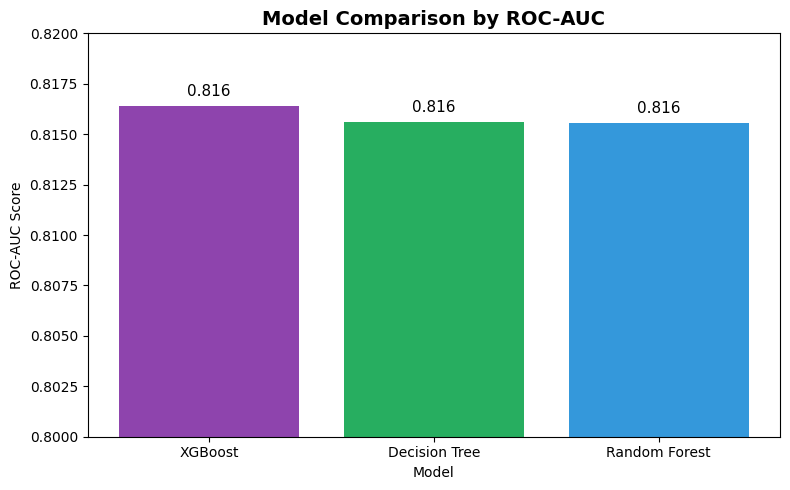

[CV] END model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=80; total time=   1.2s
[CV] END model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=80; total time=   1.2s
[CV] END model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=80; total time=   1.2s
[CV] END model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=80; total time=   1.2s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=80; total time=   1.6s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=80; total time=   1.7s
[CV] END model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=120; total time=   1.7s
[CV] END model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=120;

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["ROC-AUC"], color=['#8e44ad','#27ae60','#3498db'])
plt.title("Model Comparison by ROC-AUC", fontsize=14, fontweight='bold')
plt.ylabel("ROC-AUC Score")
plt.xlabel("Model")
plt.ylim(0.80, 0.82)
for i, val in enumerate(results_df["ROC-AUC"]):
    plt.text(i, val + 0.0005, f"{val:.3f}", ha='center', fontsize=11)
plt.tight_layout()
plt.show()
